In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
from ExperienceReplayBuffer import ExperienceReplayBuffer
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [3]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

# 这个相对于8.1.2多了一个Experience pool

In [4]:
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:
        experiencePool.add_expericence(exp)

In [5]:
action_values = np.random.rand(25,5)
learning_rate = 0.01
gamma = 0.99
batch_size = 500

  0%|          | 0/2000 [00:00<?, ?it/s]

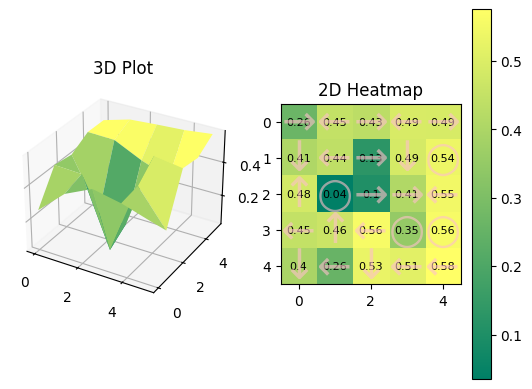

  8%|▊         | 150/2000 [00:00<00:02, 635.29it/s]

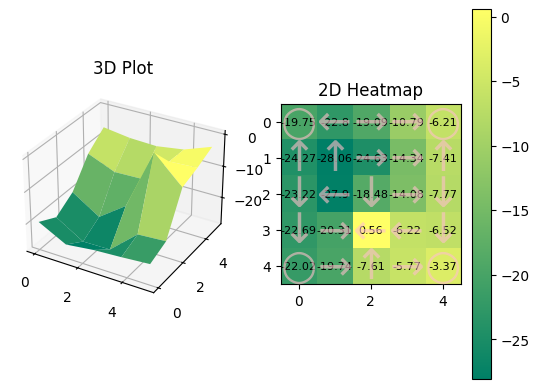

 12%|█▏        | 238/2000 [00:00<00:03, 475.96it/s]

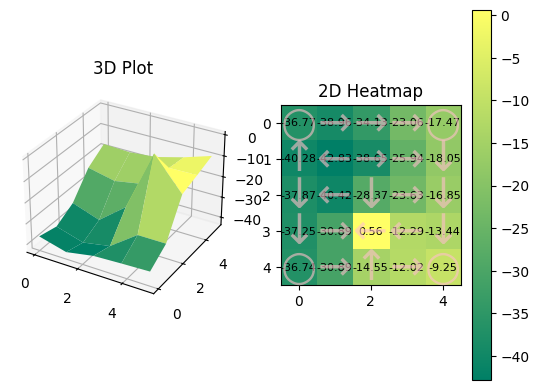

 28%|██▊       | 564/2000 [00:00<00:01, 771.03it/s]

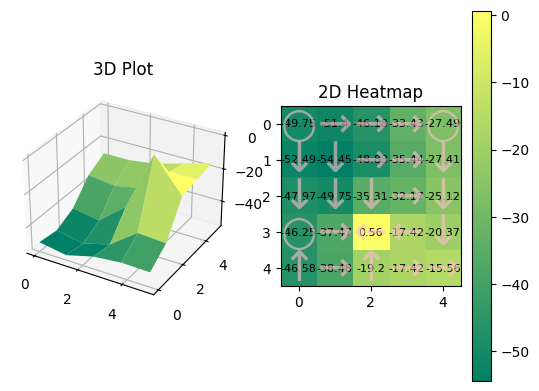

 33%|███▎      | 664/2000 [00:01<00:02, 657.03it/s]

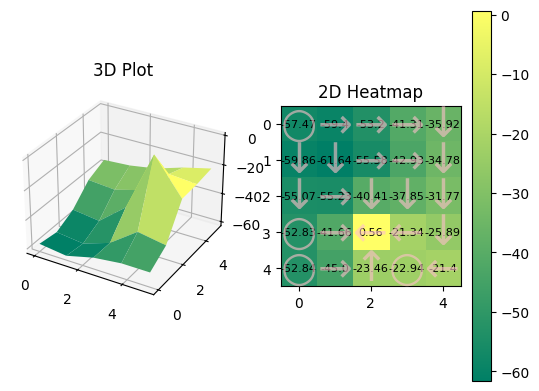

 49%|████▉     | 976/2000 [00:01<00:01, 810.48it/s]

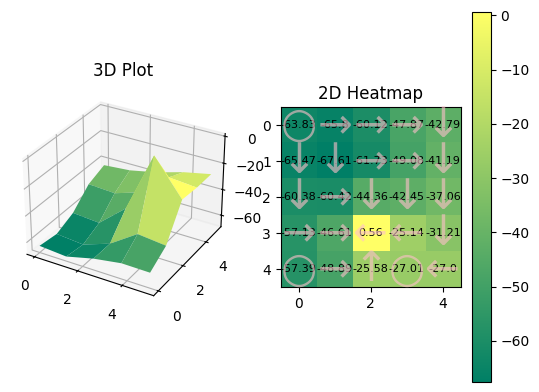

 54%|█████▍    | 1081/2000 [00:01<00:01, 693.52it/s]

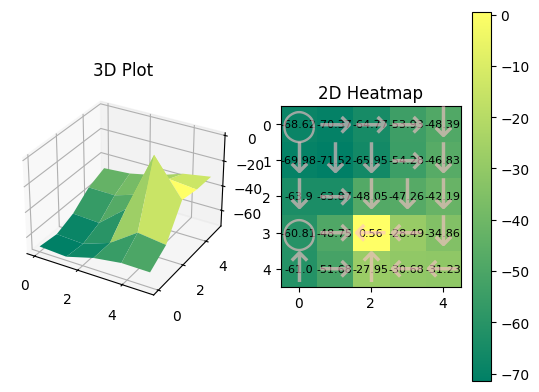

 69%|██████▊   | 1372/2000 [00:02<00:00, 819.03it/s]

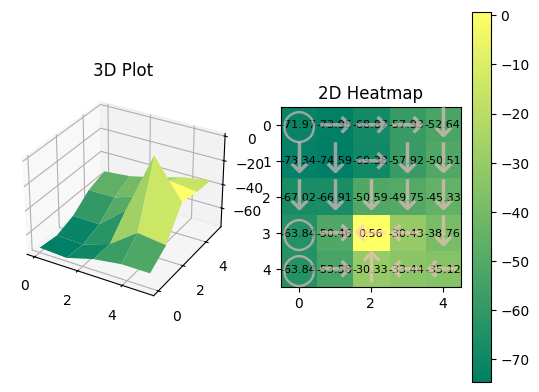

 80%|███████▉  | 1595/2000 [00:02<00:00, 728.69it/s]

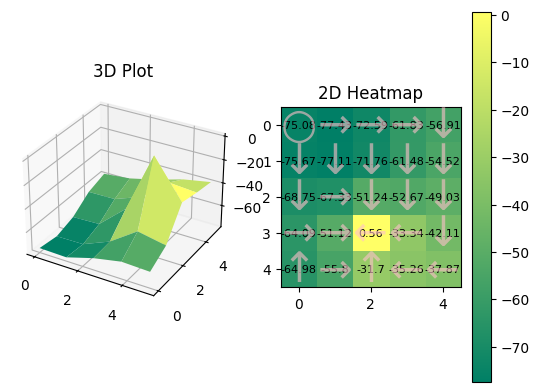

 84%|████████▍ | 1690/2000 [00:02<00:00, 636.70it/s]

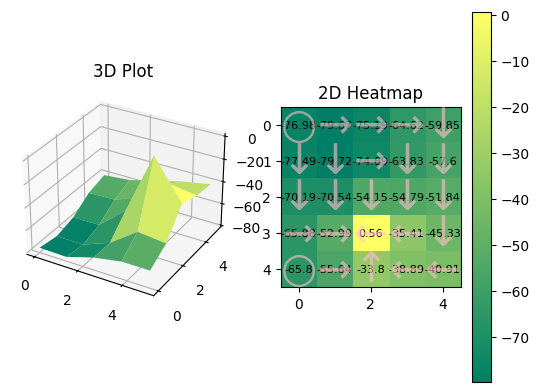

100%|██████████| 2000/2000 [00:02<00:00, 676.92it/s]


In [6]:
for _ in tqdm.tqdm(range(2000)):  # 循环2000次训练迭代，使用tqdm显示进度条
    exps = experiencePool.sample_exps(batch_size=batch_size)  # 从经验池中采样指定数量的经验
    for trajectory in exps:  # 遍历每个采样的经验
        tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory  # 解包经验数据：当前状态、动作、奖励、下一状态、下一动作、终止标志
        
        next_action_value = action_values[nextState][nextAction]  # 获取下一状态下一动作的价值
        target = tmpscore + (1.0 - terminal) * gamma * next_action_value  # 计算TD目标值：即时奖励加上折扣的下一状态价值（如果不是终止状态）
        
        TD_error = action_values[tmpstate][tmpaction] - target  # 计算TD误差：当前动作价值与目标值之间的差异
        action_values[tmpstate][tmpaction] -= learning_rate * TD_error  # 使用TD误差更新动作价值函数
    if _ % 200 == 0:  # 每200次迭代绘制一次结果
        state_values = np.sum(policy * action_values,axis=1)  # 计算状态价值：策略和动作价值的加权和
        p = np.argmax(action_values,axis=1)  # 获取每个状态的最优动作
        draw(state_values.reshape(5,5), p)  # 绘制状态价值和策略